**Integrated Project**

**Digital Technology in Accounting and Finance**

S. F. BARNARD - 223118931 (Python Script & Output)

Introduction

This project aims to serve the needs of key stakeholders by utilising data cleaning, sorting, analysis, visualisation and interpretation. Each stakeholder has unique interests and thus unique metrics/insights needed to fulfill their needs.

---

Stakeholders and their respective needs:

Chief Financial Officer (CFO): Interested in detailed profitability across sales channels and product categories

Sales and Marketing Team: Focused on understanding which product channels perform best to optimise sales strategies

Inventory Management Team: Use Insights to adjust inventory levels and product offerings.

---

Key Metrics:

Gross Profit: Sales Amount - (Unit Cost * Quantity)

Profit Per Unit: GrossProfit / Quantity

Margin Per Unit: (Profit Per unit / Unit Price) * 100

Quantity Sold: Total Number of Products Sold i.e. Sales Volume.

---

Key Questions:

1. Which Sales Channels Are Most Profitable?

2. Which Product Categories are most profitable?

3. Are there differences in product category profitability across channels?

4. What products are most/least profitable in each category?

Most Profitable Sales Channels:
  Sales_Channel  GrossProfit
0      In-Store    164690.24
1        Online    183135.47
2       Partner    198645.46


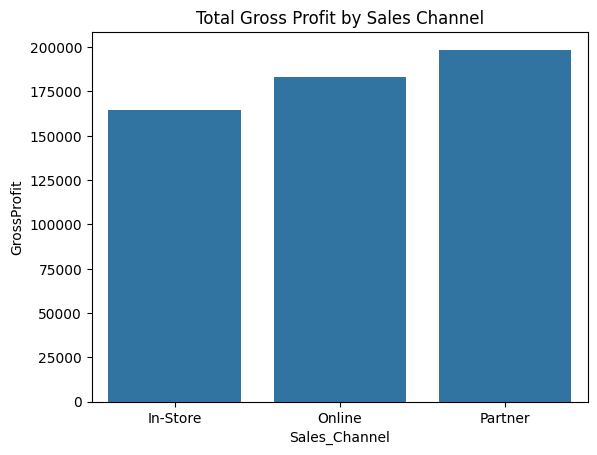

Most Profitable Product Categories:
      Category  GrossProfit
0      Apparel    122478.83
1  Electronics    259911.87
2   Home Goods    164080.47


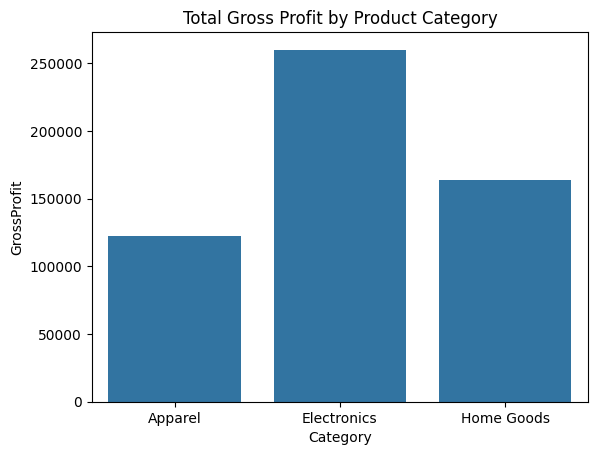

Product Category Profitability Across Channels:
Sales_Channel     Category  In-Store    Online   Partner
0                  Apparel  35319.05  40042.41  47117.37
1              Electronics  78559.08  84878.81  96473.98
2               Home Goods  50812.11  58214.25  55054.11


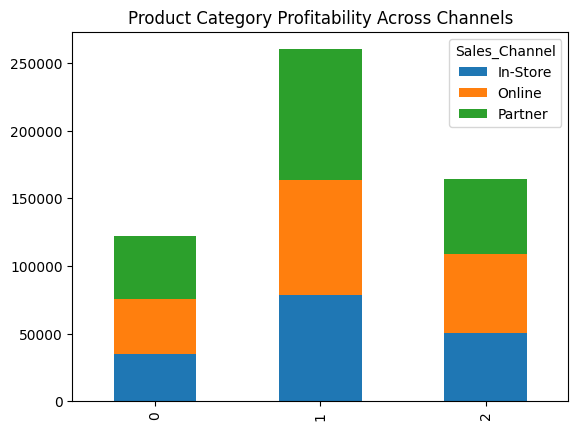

Most Profitable Products in Each Category:
       Category  Product_ID  GrossProfit
3       Apparel          12     51185.08
7   Electronics           3     49276.14
16   Home Goods           8     41427.19

Least Profitable Products in Each Category:
       Category  Product_ID  GrossProfit
5       Apparel          19      4400.15
8   Electronics           4      8860.58
19   Home Goods          18     17482.60


In [ ]:
#Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Source Files
q1_sales = pd.read_excel('/content/Integrated Project Data/ProjectQ1Sales.xlsx')
q2_sales = pd.read_excel('/content/Integrated Project Data/ProjectQ2Sales.xlsx')
q3_sales = pd.read_excel('/content/Integrated Project Data/ProjectQ3Sales.xlsx')
q4_sales = pd.read_excel('/content/Integrated Project Data/ProjectQ4Sales.xlsx')
project_products = pd.read_csv('/content/Integrated Project Data/Project_products.csv')
project_costs = pd.read_csv('/content/Integrated Project Data/Project_standard_costs.csv')

#Merge quarterly sales data into one dataframe
df_sales = pd.concat([q1_sales, q2_sales, q3_sales, q4_sales])

#Clean data to be sorted chronologically
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_sales = df_sales.sort_values(by='Date')

#Link Product_ID between Project Sales and Project Costs files
df = df_sales.merge(project_products, on='Product_ID')
df = df.merge(project_costs, on='Product_ID')

#Metrics Calculations
df['GrossProfit'] = df['Sales_Amount'] - (df['Unit_Cost'] * df['Quantity_Sold'])
df['ProfitPerUnit'] = df['GrossProfit'] / df['Quantity_Sold']
df['MarginPerUnit'] = (df['ProfitPerUnit'] / df['Unit_Price']) * 100

#1. Most profitable sales channels
channel_profit = df.groupby('Sales_Channel')['GrossProfit'].sum().reset_index()
print("Most Profitable Sales Channels:")
print(channel_profit)

sns.barplot(data=channel_profit, x='Sales_Channel', y='GrossProfit')
plt.title('Total Gross Profit by Sales Channel')
plt.show()

# 2. Most profitable product categories
category_profit = df.groupby('Category')['GrossProfit'].sum().reset_index()
print("Most Profitable Product Categories:")
print(category_profit)

sns.barplot(data=category_profit, x='Category', y='GrossProfit')
plt.title('Total Gross Profit by Product Category')
plt.show()

#3. Are there differences in product category profitability across channels?
category_channel_profit = df.groupby(['Category', 'Sales_Channel'])['GrossProfit'].sum().unstack().reset_index()
print("Product Category Profitability Across Channels:")
print(category_channel_profit)

category_channel_profit.plot(kind='bar', stacked=True)
plt.title('Product Category Profitability Across Channels')
plt.show()

#4. Most/least profitable products in each category?
product_profit = df.groupby(['Category', 'Product_ID'])['GrossProfit'].sum().reset_index()
most_profitable_products = product_profit.sort_values(by='GrossProfit', ascending=False).groupby('Category').head(1)
least_profitable_products = product_profit.sort_values(by='GrossProfit').groupby('Category').head(1)

#Results output
print("Most Profitable Products in Each Category:")
print(most_profitable_products)

print("\nLeast Profitable Products in Each Category:")
print(least_profitable_products)


**Stakeholder Consultation**

**1. Chief Financial Officer (CFO)**

Detailed profitability across sales channels and product categories:

For Apparel:

Most profitable in the Partner channel ($47,117.37).

Least profitable in the In-Store channel ($35,319.05).

For Electronics:

Most profitable in the Partner channel ($96,473.98).

Least profitable in the In-Store channel ($78,559.08).

For Home Goods:

Most profitable in the Online channel ($58,214.25).

Least profitable in the In-Store channel ($50,812.11).

**2. Sales and Marketing Team**

Which product channels perform best:

Product Channel Gross Profit:

Partner: $198,645.46

Online: $183,135.47

In-Store: $164,690.24

**3. Inventory Management Team**

Channels:

1. Prioritise partner channel as it yields the highest gross profit. Sufficient stock should be insured and prioritised for this channel

2. Grow Online Sales: Online sales shows potential and approaches the same profitability of the Partner channel. Online sales are also easier to scale in terms of quantity and should be considered as a growth avenue for the company.

Product Offerings:

1. Prioritise Electronics inventory given the fact that it's the most profitable product category. Scaling this product category would yield substantial profits for the company.

2. Re-evaluate Apparel and Home goods. These product categories need to be investigated in order to yield greater profits.

**Conclusion**

Each stakeholder's needs have been successfully met with a combination of data cleaning, sorting, analysis, visualisation and interpretation. In the consultation, the power of both Python and its respective data analysis libraries such as Pandas, Numpy, Matplotlib and Seaborn has been demonstrated. Google Colab and Jupyter offered an integrated development that streamlined this project's workflow without the need to download Python or a seperate IDE suchs as visual studio code. Projects like this truly highlight the capabalities of technology in finance.  